## 1. Importazione delle Librerie

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

# Configurazione dello stile dei grafici
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Librerie importate con successo!")

✓ Librerie importate con successo!


## 2. Caricamento del Dataset Iris

In [2]:
# Caricamento del dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(f"Dimensioni del dataset: {df.shape}")
print(f"\nColonne: {list(df.columns)}")
print("\nPrime righe del dataset:")
df.head(10)

Dimensioni del dataset: (150, 5)

Colonne: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

Prime righe del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
# Statistiche descrittive
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

## 3. Istogramma

L'**istogramma** mostra la distribuzione di frequenza di una variabile continua.
È utile per capire la forma della distribuzione (normale, asimmetrica, bimodale, etc.)

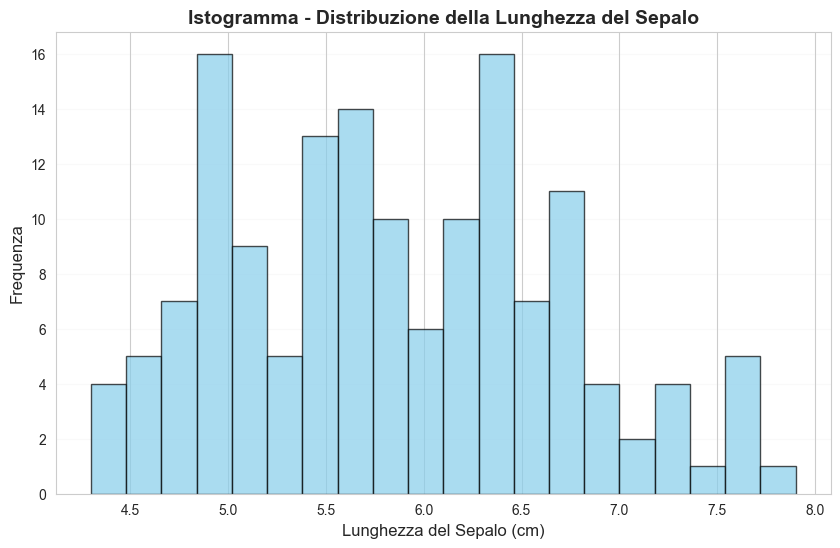

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['sepal length (cm)'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Lunghezza del Sepalo (cm)', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.title('Istogramma - Distribuzione della Lunghezza del Sepalo', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.1)
plt.show()

### Istogrammi per tutte le feature

### 📊 Analisi dell'Istogramma

**Osservazioni:**
- La distribuzione della lunghezza del sepalo mostra una forma **bimodale** (due picchi)
- Il primo picco è intorno a 5.0-5.5 cm (probabilmente la specie setosa)
- Il secondo picco è intorno a 6.0-6.5 cm (versicolor e virginica)
- La maggior parte dei valori si concentra tra 5 cm e 7 cm
- Non ci sono outlier evidenti o valori anomali

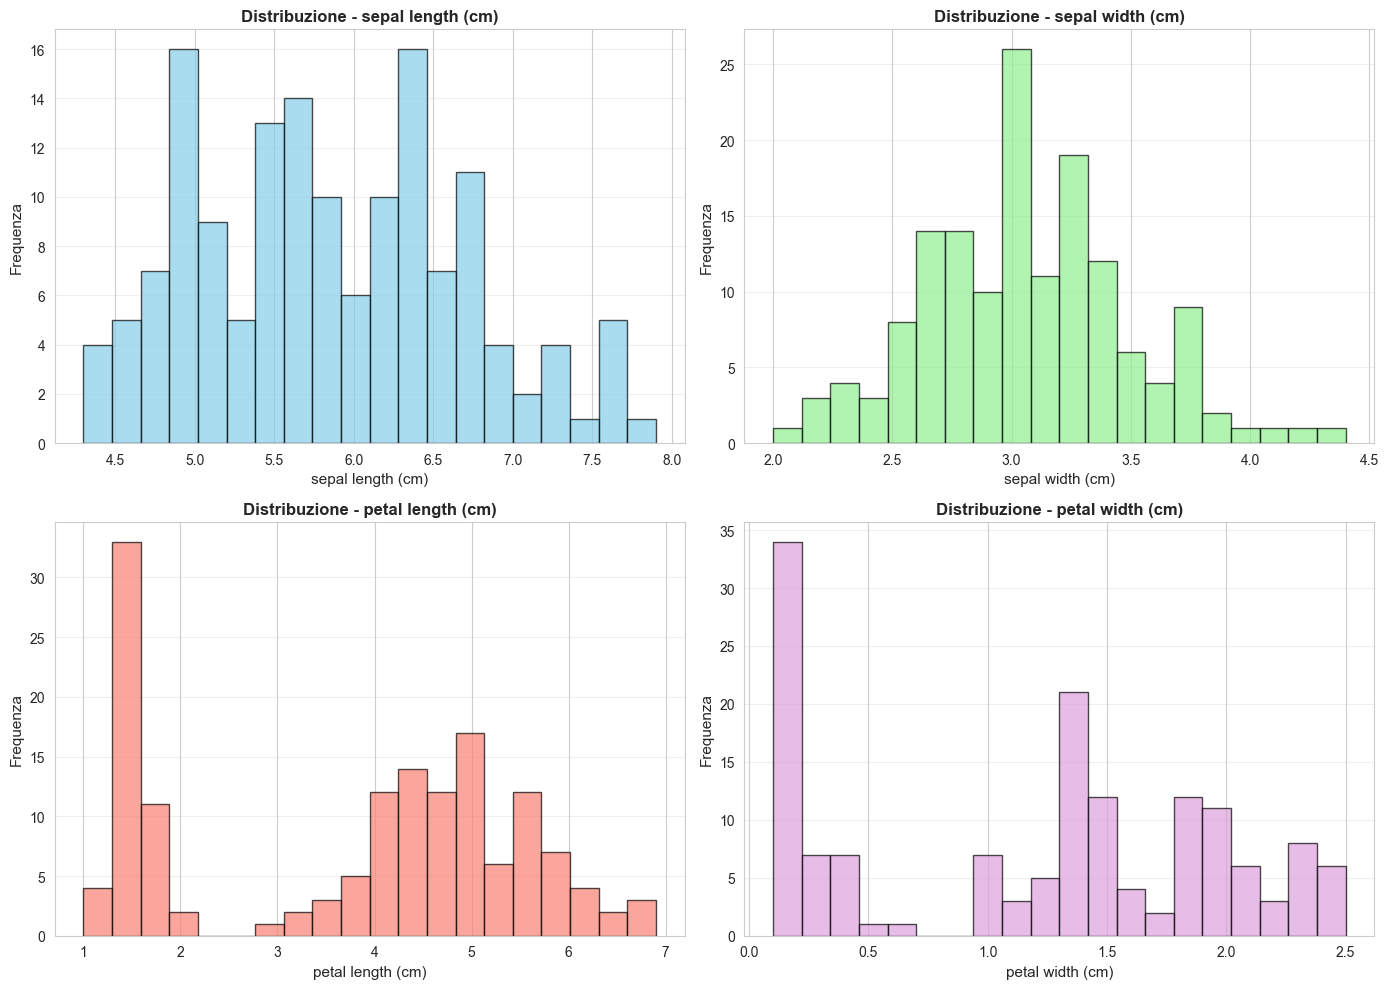

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for idx, (feature, color) in enumerate(zip(features, colors)):
    ax = axes[idx // 2, idx % 2]
    ax.hist(df[feature], bins=20, color=color, edgecolor='black', alpha=0.7)
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Frequenza', fontsize=11)
    ax.set_title(f'Distribuzione - {feature}', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 📊 Analisi degli Istogrammi per Feature

**Osservazioni chiave:**
- **Sepal length**: distribuzione quasi normale con leggera bimodalità
- **Sepal width**: distribuzione più concentrata intorno a 3 cm, forma simmetrica
- **Petal length**: distribuzione chiaramente bimodale - separazione netta tra le specie
- **Petal width**: anche qui bimodalità evidente - la caratteristica più discriminante

Le caratteristiche dei petali mostrano una separazione molto più netta tra le specie rispetto ai sepali.

## 4. Grafico a Barre

Il **grafico a barre** visualizza dati categorici e le loro frequenze.
È perfetto per confrontare quantità tra diverse categorie.

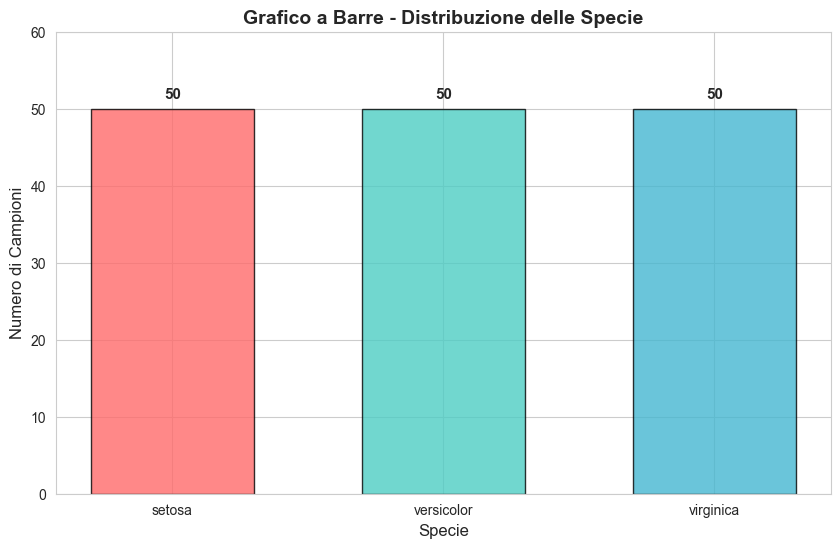

In [7]:
plt.figure(figsize=(10, 6))
species_counts = df['species'].value_counts()
bars = plt.bar(species_counts.index, species_counts.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], 
               edgecolor='black', alpha=0.8, width=0.6)

plt.xlabel('Specie', fontsize=12)
plt.ylabel('Numero di Campioni', fontsize=12)
plt.title('Grafico a Barre - Distribuzione delle Specie', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

# Aggiungi valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.ylim(0, max(species_counts.values) + 10)
plt.show()

### 📊 Analisi del Grafico a Barre - Distribuzione Specie

**Osservazioni:**
- Il dataset è **perfettamente bilanciato**: ogni specie ha esattamente 50 campioni
- Non c'è sbilanciamento dei dati (class imbalance)
- Questo è ideale per l'addestramento di modelli di machine learning
- Le tre specie (setosa, versicolor, virginica) sono equamente rappresentate

### Grafico a Barre - Media delle feature per specie

/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_32774/1203036196.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_by_species = df.groupby('species')[features].mean()


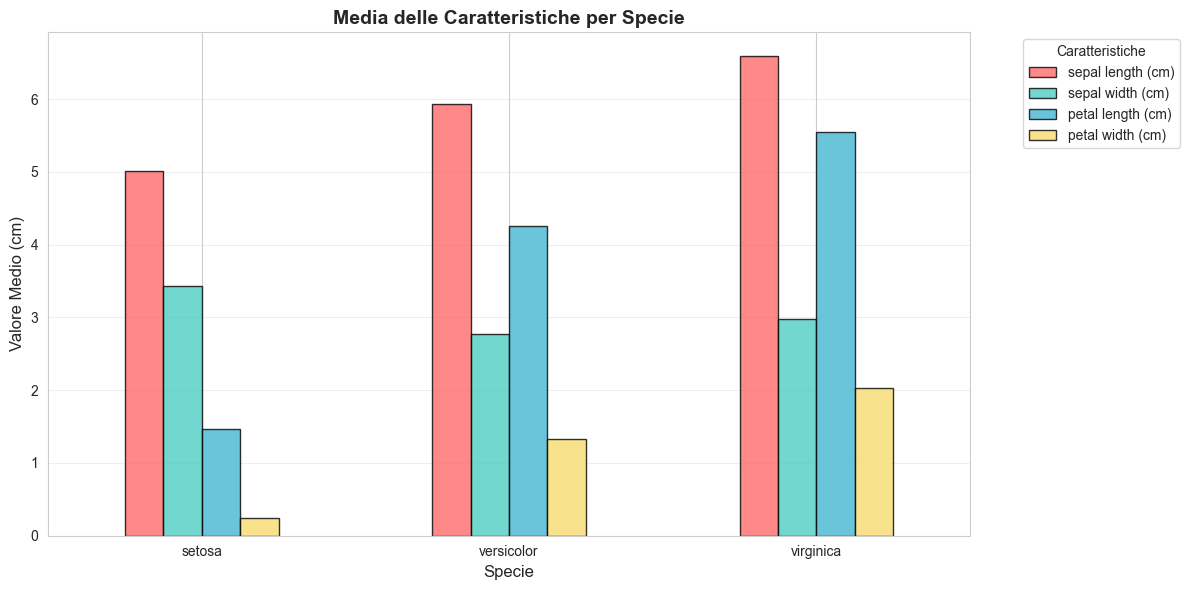

In [8]:
# Calcola le medie per specie
means_by_species = df.groupby('species')[features].mean()

# Crea il grafico
means_by_species.plot(kind='bar', figsize=(12, 6), 
                      color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#F7DC6F'],
                      edgecolor='black', alpha=0.8)
plt.xlabel('Specie', fontsize=12)
plt.ylabel('Valore Medio (cm)', fontsize=12)
plt.title('Media delle Caratteristiche per Specie', fontsize=14, fontweight='bold')
plt.legend(title='Caratteristiche', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Analisi del Grafico a Barre - Medie per Specie

**Osservazioni importanti:**
- **Setosa** ha sepali più corti ma più larghi rispetto alle altre specie
- **Virginica** ha i petali più grandi (sia in lunghezza che larghezza)
- **Versicolor** ha valori intermedi tra setosa e virginica
- Le differenze più marcate si osservano nelle dimensioni dei petali
- La lunghezza dei petali varia da ~1.5 cm (setosa) a ~5.5 cm (virginica)

## 5. Scatter Plot

Lo **scatter plot** mostra la relazione tra due variabili continue.
Permette di identificare correlazioni, cluster e pattern nei dati.

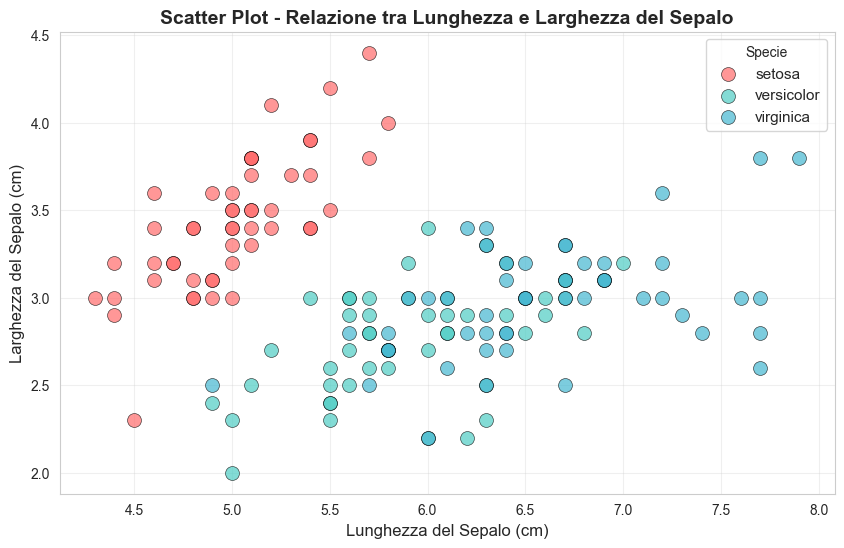

In [9]:
plt.figure(figsize=(10, 6))
colors_map = {'setosa': '#FF6B6B', 'versicolor': '#4ECDC4', 'virginica': '#45B7D1'}

for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
                label=species, alpha=0.7, s=100, edgecolors='black', linewidth=0.5,
                color=colors_map[species])

plt.xlabel('Lunghezza del Sepalo (cm)', fontsize=12)
plt.ylabel('Larghezza del Sepalo (cm)', fontsize=12)
plt.title('Scatter Plot - Relazione tra Lunghezza e Larghezza del Sepalo', 
          fontsize=14, fontweight='bold')
plt.legend(title='Specie', fontsize=11)
plt.grid(alpha=0.3)
plt.show()

### 📊 Analisi dello Scatter Plot - Sepali

**Osservazioni:**
- **Setosa** (rosso) è ben separata dalle altre due specie nello spazio dei sepali
- Setosa ha sepali più corti ma relativamente più larghi
- **Versicolor** e **Virginica** si sovrappongono parzialmente
- Si nota una leggera correlazione negativa tra lunghezza e larghezza del sepalo
- La separabilità non è perfetta usando solo le caratteristiche dei sepali

### Scatter Plot - Petali

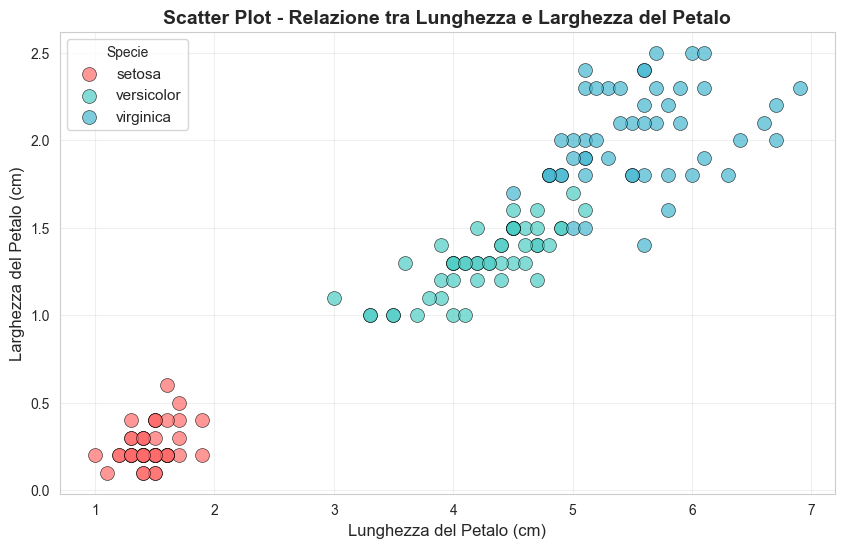

In [10]:
plt.figure(figsize=(10, 6))

for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                label=species, alpha=0.7, s=100, edgecolors='black', linewidth=0.5,
                color=colors_map[species])

plt.xlabel('Lunghezza del Petalo (cm)', fontsize=12)
plt.ylabel('Larghezza del Petalo (cm)', fontsize=12)
plt.title('Scatter Plot - Relazione tra Lunghezza e Larghezza del Petalo', 
          fontsize=14, fontweight='bold')
plt.legend(title='Specie', fontsize=11)
plt.grid(alpha=0.3)
plt.show()

### 📊 Analisi dello Scatter Plot - Petali

**Osservazioni fondamentali:**
- **Separazione eccellente** tra le tre specie usando le dimensioni dei petali
- **Setosa** forma un cluster compatto e ben separato (in basso a sinistra)
- **Versicolor** e **Virginica** sono più distinguibili rispetto al grafico dei sepali
- Si osserva una **forte correlazione positiva** tra lunghezza e larghezza dei petali
- Questo scatter plot suggerisce che i petali sono feature molto discriminanti per la classificazione
- Un modello di machine learning potrebbe facilmente separare queste classi

## 6. Box Plot

Il **box plot** visualizza la distribuzione dei dati attraverso i quartili.
Mostra:
- La mediana (linea centrale)
- I quartili (Q1 e Q3 - limiti della scatola)
- Il range interquartile (IQR)
- Gli outlier (punti fuori dai baffi)

/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_32774/2752063324.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Feature', y='Value', palette='Set2')


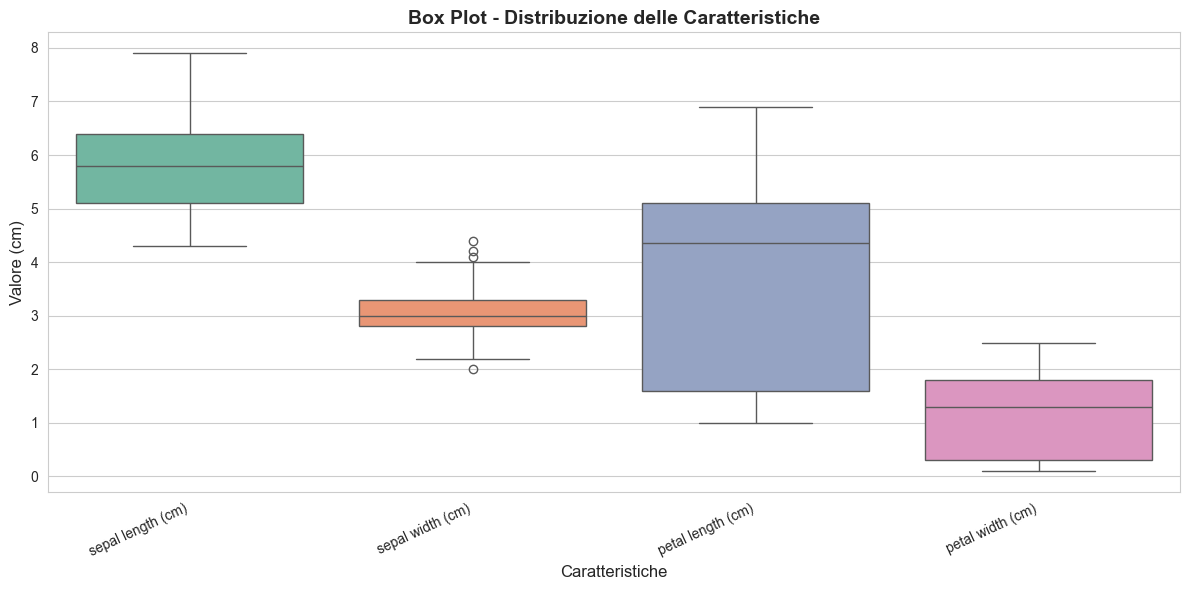

In [11]:
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars='species', 
                    value_vars=features,
                    var_name='Feature', value_name='Value')

sns.boxplot(data=df_melted, x='Feature', y='Value', palette='Set2')
plt.xlabel('Caratteristiche', fontsize=12)
plt.ylabel('Valore (cm)', fontsize=12)
plt.title('Box Plot - Distribuzione delle Caratteristiche', fontsize=14, fontweight='bold')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

## 7. Heatmap

La **heatmap** rappresenta i valori di una matrice con colori.
Qui la usiamo per visualizzare la **matrice di correlazione** tra le diverse caratteristiche:
- Valori vicini a 1: forte correlazione positiva
- Valori vicini a -1: forte correlazione negativa
- Valori vicini a 0: nessuna correlazione

In [13]:
# Calcola la matrice di correlazione
correlation_matrix = df[features].corr()

print("Matrice di Correlazione:")
print(correlation_matrix)

Matrice di Correlazione:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


### 📊 Analisi del Box Plot - Tutte le Feature

**Osservazioni:**
- **Petal length** ha il range più ampio (da ~1 cm a ~7 cm)
- **Sepal width** ha la distribuzione più compatta
- Si notano alcuni **outlier** (punti oltre i baffi) in diverse feature
- Le mediane (linee centrali) sono diverse per ciascuna caratteristica
- Il box plot è utile per identificare outlier e confrontare le distribuzioni

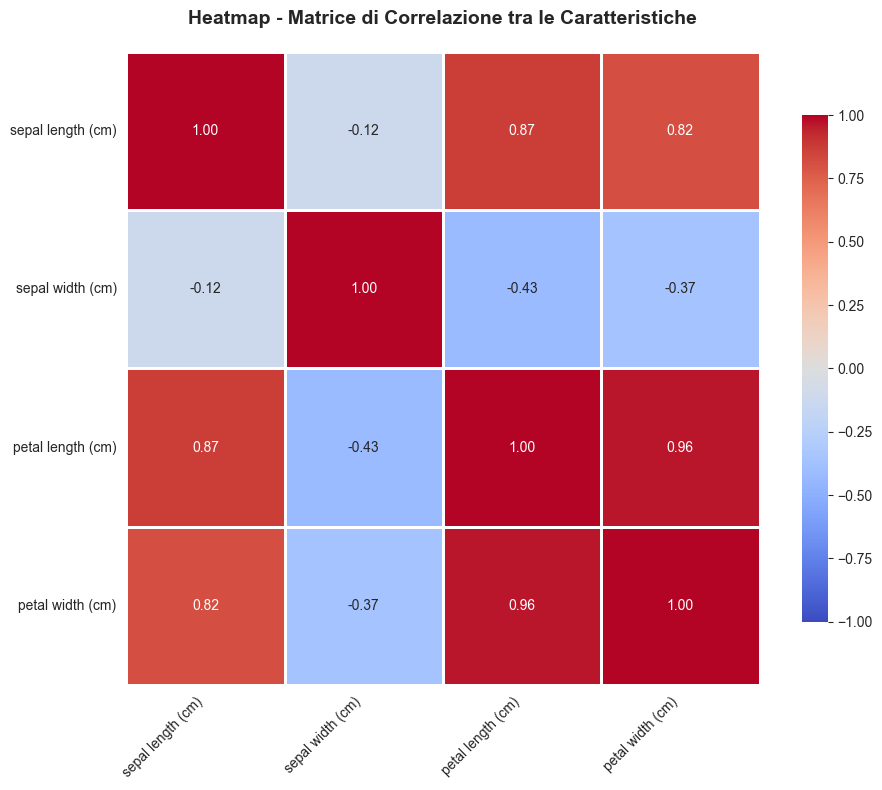

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)
plt.title('Heatmap - Matrice di Correlazione tra le Caratteristiche', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()